In [1]:
# Connect to Colab
from google.colab import drive
drive.mount('/content/drive/')

# Go to the folder containing the data
%cd /content/drive/MyDrive/Projet_A3S5/Donnees

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1VyeGE8G8NemjPGnlHQA2fEjmVxwDsQTS/Projet_A3S5/Donnees


In [2]:
import os
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [3]:
#import the metadata file
source_folder = os.path.join('Final_Data','Femur')
metadata = os.path.join(source_folder,'Metadata.xlsx')
df = pd.read_excel(metadata)
print(df.head())

       Name  Orientation_pca Orientation_manual  Label  From_Stanford
0  Femur_01                1                  D      1              0
1  Femur_02                1                  D      0              0
2  Femur_04                0                  G      0              0
3  Femur_06                1                  D      1              0
4  Femur_07                1                  G      1              0


# Femurs sains

In [ ]:
# select the data from Stanford and those which are healthy
df_mask=df['From_Stanford']==1
filtered_df = df[df_mask]
df_mask2=df['Label']==0
filtered_df2 = filtered_df[df_mask2]
print(filtered_df2)

              Name  Orientation_pca Orientation_manual  Label  From_Stanford
34   Femur_PHC_001                1                  D      0              1
35   Femur_PHC_005                0                  G      0              1
37   Femur_PHC_008                0                  G      0              1
38   Femur_PHC_010                0                  G      0              1
39   Femur_PHC_013                0                  G      0              1
..             ...              ...                ...    ...            ...
178  Femur_PHC_233                1                NaN      0              1
180  Femur_PHC_236                1                NaN      0              1
184  Femur_PHC_243                1                NaN      0              1
185  Femur_PHC_244                0                NaN      0              1
188  Femur_PHC_251                1                NaN      0              1

[84 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
# extract the names of the files and their orientation
names = filtered_df2['Name'].to_list()
print(names)

['Femur_PHC_001', 'Femur_PHC_005', 'Femur_PHC_008', 'Femur_PHC_010', 'Femur_PHC_013', 'Femur_PHC_018', 'Femur_PHC_019', 'Femur_PHC_028', 'Femur_PHC_037', 'Femur_PHC_038', 'Femur_PHC_043', 'Femur_PHC_048', 'Femur_PHC_049', 'Femur_PHC_051', 'Femur_PHC_065', 'Femur_PHC_071', 'Femur_PHC_074', 'Femur_PHC_077', 'Femur_PHC_079', 'Femur_PHC_080', 'Femur_PHC_087', 'Femur_PHC_096', 'Femur_PHC_098', 'Femur_PHC_099', 'Femur_PHC_100', 'Femur_PHC_101', 'Femur_PHC_103', 'Femur_PHC_109', 'Femur_PHC_113', 'Femur_PHC_115', 'Femur_PHC_116', 'Femur_PHC_118', 'Femur_PHC_120', 'Femur_PHC_122', 'Femur_PHC_124', 'Femur_PHC_127', 'Femur_PHC_129', 'Femur_PHC_133', 'Femur_PHC_139', 'Femur_PHC_140', 'Femur_PHC_144', 'Femur_PHC_146', 'Femur_PHC_148', 'Femur_PHC_149', 'Femur_PHC_151', 'Femur_PHC_159', 'Femur_PHC_167', 'Femur_PHC_173', 'Femur_PHC_174', 'Femur_PHC_176', 'Femur_PHC_177', 'Femur_PHC_178', 'Femur_PHC_179', 'Femur_PHC_182', 'Femur_PHC_186', 'Femur_PHC_191', 'Femur_PHC_192', 'Femur_PHC_193', 'Femur_PHC_19

## Mean


<function matplotlib.pyplot.plot>

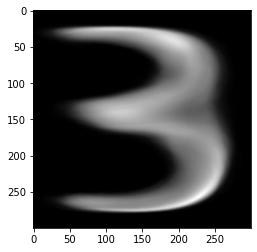

In [ ]:
#Creating and plotting affine average image of femoral cartilage 
image_moyenne_affine_femur = np.zeros((300,300))
for i in range(len(names)):
    im = Image.open('Final_Data/Femur/Map/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_femur+=im_arr
image_moyenne_affine_femur//=len(names)
#Plotting affine average images of femoral cartilage 
plt.imshow(image_moyenne_affine_femur,cmap="gray")
plt.imsave("Final_Data/Femur/Map/Affine/image_moyenne_femur_sain_Stanford.png",image_moyenne_affine_femur,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

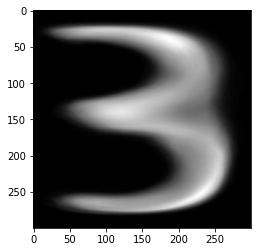

In [ ]:
#Creating and plotting affine rigide image of femoral cartilage 
image_moyenne_affine_femur = np.zeros((300,300))
for i in range(len(names)):
    im = Image.open('Final_Data/Femur/Map/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_femur+=im_arr
image_moyenne_affine_femur//=len(names)
#Plotting rigide average images of femoral cartilage 
plt.imshow(image_moyenne_affine_femur,cmap="gray")
plt.imsave("Final_Data/Femur/Map/Rigid/image_moyenne_femur_sain_Stanford.png",image_moyenne_affine_femur,cmap="gray")
plt.plot

## Max

<function matplotlib.pyplot.plot>

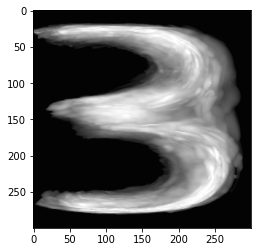

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine = Image.open('Final_Data/Femur/Map/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]>image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave("Final_Data/Femur/Map/Affine/image_max_sain_Stanford.png",image_max_affine_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

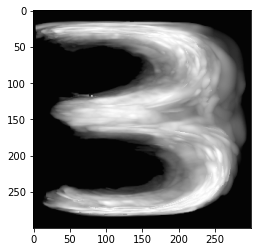

In [ ]:
#Create max images after rigide registration of superior tibial cartilage
image_max_affine = Image.open('Final_Data/Femur/Map/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]>image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave('Final_Data/Femur/Map/Rigid/image_max_sain_Stanford.png',image_max_affine_array,cmap="gray")
plt.plot

## Min


<function matplotlib.pyplot.plot>

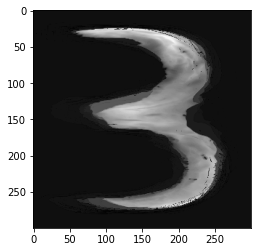

In [ ]:
#Create max images after affine registration of femoral cartilage 
image_max_affine = Image.open('Final_Data/Femur/Map/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]<image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave('Final_Data/Femur/Map/Affine/image_min_sain_Stanford.png',image_max_affine_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

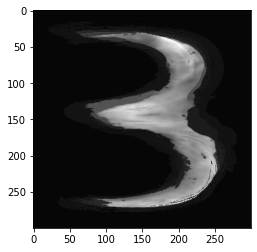

In [ ]:
#Create max images after rigide registration of femoral cartilage 
image_max_affine = Image.open('Final_Data/Femur/Map/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]<image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave('Final_Data/Femur/Map/Rigid/image_min_sain_Stanford.png',image_max_affine_array,cmap="gray")
plt.plot

# Tibias sains


In [4]:
#import the metadata file
source_folder = os.path.join('Final_Data','Tibia')
metadata = os.path.join(source_folder,'Metadata.xlsx')
df = pd.read_excel(metadata)
print(df.head())

       Name  Orientation_pca Orientation_manual  Label  From_Stanford
0  Tibia_01                0                  D      1              0
1  Tibia_02                0                  D      1              0
2  Tibia_03                0                  G      1              0
3  Tibia_04                0                  G      1              0
4  Tibia_06                0                  D      1              0


In [5]:
# select the data from Stanford and those which are healthy
df_mask=df['From_Stanford']==1
filtered_df = df[df_mask]
df_mask2=df['Label']==0
filtered_df2 = filtered_df[df_mask2]
print(filtered_df2)

              Name  Orientation_pca Orientation_manual  Label  From_Stanford
38   Tibia_PHC_001                1                  D      0              1
39   Tibia_PHC_005                1                  G      0              1
41   Tibia_PHC_008                1                  G      0              1
42   Tibia_PHC_010                1                  G      0              1
43   Tibia_PHC_013                1                  G      0              1
..             ...              ...                ...    ...            ...
186  Tibia_PHC_240                0                NaN      0              1
188  TIbia_PHC_243                1                NaN      0              1
189  Tibia_PHC_244                1                NaN      0              1
191  Tibia_PHC_248                0                  G      0              1
192  Tibia_PHC_251                0                NaN      0              1

[118 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [6]:
# extract the names of the files and their orientation
names = filtered_df2['Name'].to_list()
print(names)

['Tibia_PHC_001', 'Tibia_PHC_005', 'Tibia_PHC_008', 'Tibia_PHC_010', 'Tibia_PHC_013', 'Tibia_PHC_015', 'Tibia_PHC_016', 'Tibia_PHC_018', 'Tibia_PHC_019', 'Tibia_PHC_020', 'Tibia_PHC_023', 'Tibia_PHC_026', 'Tibia_PHC_028', 'Tibia_PHC_033', 'Tibia_PHC_034', 'Tibia_PHC_037', 'Tibia_PHC_038', 'Tibia_PHC_040', 'Tibia_PHC_043', 'Tibia_PHC_044', 'Tibia_PHC_046', 'Tibia_PHC_047', 'Tibia_PHC_048', 'Tibia_PHC_049', 'Tibia_PHC_051', 'Tibia_PHC_052', 'Tibia_PHC_056', 'Tibia_PHC_057', 'Tibia_PHC_061', 'Tibia_PHC_062', 'Tibia_PHC_065', 'Tibia_PHC_069', 'Tibia_PHC_074', 'Tibia_PHC_077', 'Tibia_PHC_079', 'Tibia_PHC_080', 'Tibia_PHC_093', 'Tibia_PHC_095', 'Tibia_PHC_096', 'Tibia_PHC_097', 'Tibia_PHC_098', 'Tibia_PHC_099', 'Tibia_PHC_100', 'Tibia_PHC_101', 'Tibia_PHC_103', 'Tibia_PHC_104', 'Tibia_PHC_107', 'Tibia_PHC_109', 'Tibia_PHC_110', 'Tibia_PHC_112', 'Tibia_PHC_113', 'Tibia_PHC_115', 'Tibia_PHC_116', 'Tibia_PHC_118', 'Tibia_PHC_120', 'Tibia_PHC_122', 'Tibia_PHC_124', 'Tibia_PHC_127', 'Tibia_PHC_12

## Mean

<function matplotlib.pyplot.plot>

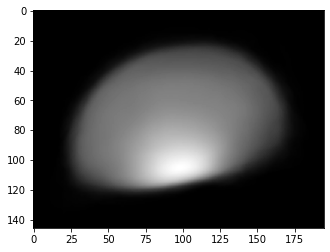

In [ ]:
#Create average images after affine registration of superior tibial cartilage
image_moyenne_affine_haut = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_haut+=im_arr
image_moyenne_affine_haut//=len(names)
#Plotting average images 
plt.imshow(image_moyenne_affine_haut,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Affine/image_moyenne_haut_sain_Stanford.png',image_moyenne_affine_haut,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

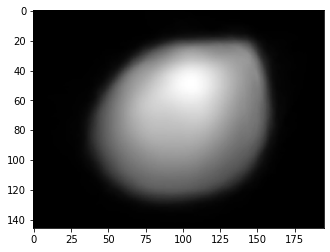

In [ ]:
#Creating average image of lower tibial cartilage after affine registration 
image_moyenne_affine_bas = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_bas+=im_arr
image_moyenne_affine_bas//=len(names)
#Plotting the average image
plt.imshow(image_moyenne_affine_bas,cmap="gray")
plt.imsave("Final_Data/Tibia/Map/Genoux_bas/Affine/image_moyenne_bas_sain_Stanford.png",image_moyenne_affine_bas,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

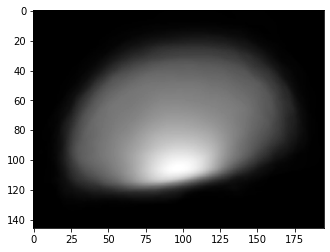

In [ ]:
#Create average image of tibial Cartilage after rigid registration 
image_moyenne_rigide_haut = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_rigide_haut+=im_arr
image_moyenne_rigide_haut//=len(names)
plt.imshow(image_moyenne_rigide_haut,cmap="gray")
#plotting the average images 
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Rigid/image_moyenne_haut_sain_Stanford.png',image_moyenne_rigide_haut,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

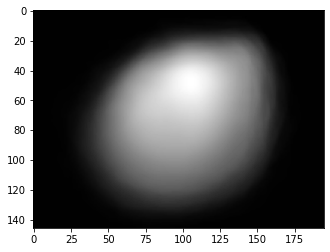

In [ ]:
#Creating average image of lower tibial cartilage after rigid registration 
image_moyenne_rigide_bas = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_rigide_bas+=im_arr
image_moyenne_rigide_bas//=len(names)
plt.imshow(image_moyenne_rigide_bas,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Rigid/image_moyenne_bas_sain_Stanford.png',image_moyenne_rigide_bas,cmap="gray")
plt.plot

## Max

<function matplotlib.pyplot.plot>

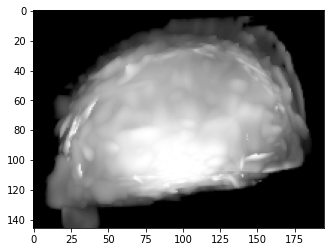

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Affine/image_max_haut_sain_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

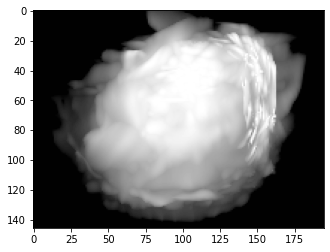

In [ ]:
#Create max images after affine registration of inferior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Affine/image_max_bas_sain_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

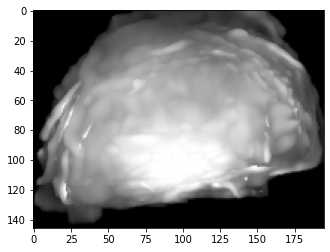

In [ ]:
#Create max images after rigid registration of superior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Rigid/image_max_haut_sain_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

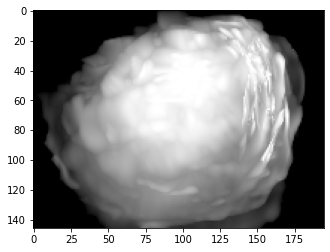

In [ ]:
#Create max images after rigid registration of inferior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Rigid/image_max_bas_sain_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

## Min

<function matplotlib.pyplot.plot>

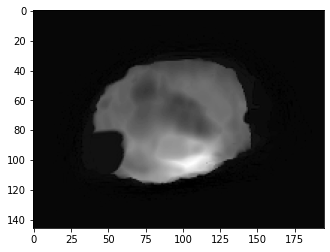

In [ ]:
#Create min images after affine registration of superior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Affine/image_min_haut_sain_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

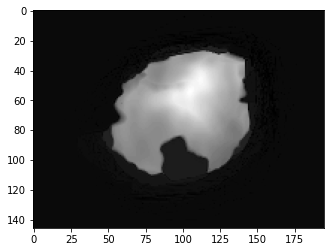

In [ ]:
#Create min images after affine registration of inferior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Affine/image_min_bas_sain_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

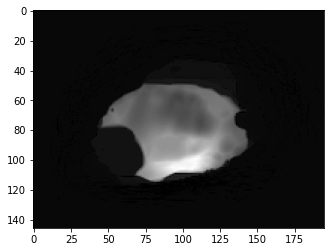

In [ ]:
#Create min images after rigid registration of superior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Rigid/rigide_min_haut_sain_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

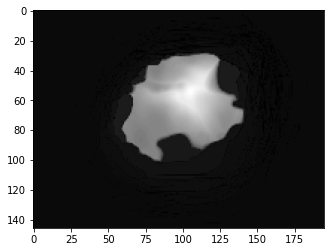

In [ ]:
#Create min images after rigid registration of inferior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Rigid/image_min_bas_sain_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

# Femurs pathos

In [ ]:
#import the metadata file
source_folder = os.path.join('Final_Data','Femur')
metadata = os.path.join(source_folder,'Metadata.xlsx')
df = pd.read_excel(metadata)
print(df.head())

       Name  Orientation_pca Orientation_manual  Label  From_Stanford
0  Femur_01                1                  D      1              0
1  Femur_02                1                  D      0              0
2  Femur_04                0                  G      0              0
3  Femur_06                1                  D      1              0
4  Femur_07                1                  G      1              0


In [ ]:
# select the data from Stanford and those which are healthy
df_mask=df['From_Stanford']==1
filtered_df = df[df_mask]
df_mask2=df['Label']==1
filtered_df2 = filtered_df[df_mask2]
print(filtered_df2)

              Name  Orientation_pca Orientation_manual  Label  From_Stanford
36   Femur_PHC_006                0                  G      1              1
40   Femur_PHC_015                0                  G      1              1
41   Femur_PHC_016                0                  G      1              1
44   Femur_PHC_020                1                  D      1              1
45   Femur_PHC_023                1                  D      1              1
..             ...              ...                ...    ...            ...
181  Femur_PHC_237                0                  G      1              1
182  Femur_PHC_240                0                NaN      1              1
183  Femur_PHC_241                0                  G      1              1
186  Femur_PHC_245                0                  G      1              1
187  Femur_PHC_248                0                  G      1              1

[71 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
# extract the names of the files and their orientation
names = filtered_df2['Name'].to_list()
print(names)

['Femur_PHC_006', 'Femur_PHC_015', 'Femur_PHC_016', 'Femur_PHC_020', 'Femur_PHC_023', 'Femur_PHC_026', 'Femur_PHC_030', 'Femur_PHC_033', 'Femur_PHC_034', 'Femur_PHC_040', 'Femur_PHC_044', 'Femur_PHC_045', 'Femur_PHC_046', 'Femur_PHC_047', 'Femur_PHC_052', 'Femur_PHC_053', 'Femur_PHC_056', 'Femur_PHC_057', 'Femur_PHC_061', 'Femur_PHC_062', 'Femur_PHC_066', 'Femur_PHC_069', 'Femur_PHC_083', 'Femur_PHC_084', 'Femur_PHC_093', 'Femur_PHC_094', 'Femur_PHC_095', 'Femur_PHC_097', 'Femur_PHC_104', 'Femur_PHC_105', 'Femur_PHC_107', 'Femur_PHC_110', 'Femur_PHC_112', 'Femur_PHC_126', 'Femur_PHC_130', 'Femur_PHC_135', 'Femur_PHC_142', 'Femur_PHC_145', 'Femur_PHC_150', 'Femur_PHC_152', 'Femur_PHC_154', 'Femur_PHC_156', 'Femur_PHC_158', 'Femur_PHC_161', 'Femur_PHC_163', 'Femur_PHC_164', 'Femur_PHC_172', 'Femur_PHC_175', 'Femur_PHC_183', 'Femur_PHC_184', 'Femur_PHC_188', 'Femur_PHC_189', 'Femur_PHC_190', 'Femur_PHC_194', 'Femur_PHC_196', 'Femur_PHC_201', 'Femur_PHC_203', 'Femur_PHC_204', 'Femur_PHC_20

## Mean

<function matplotlib.pyplot.plot>

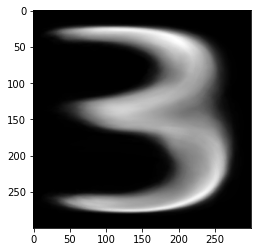

In [ ]:
#Creating and plotting affine average image of femoral cartilage 
image_moyenne_affine_femur = np.zeros((300,300))
for i in range(len(names)):
    im = Image.open('Final_Data/Femur/Map/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_femur+=im_arr
image_moyenne_affine_femur//=len(names)
#Plotting affine average images of femoral cartilage 
plt.imshow(image_moyenne_affine_femur,cmap="gray")
plt.imsave("Final_Data/Femur/Map/Affine/image_moyenne_femur_patho_Stanford.png",image_moyenne_affine_femur,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

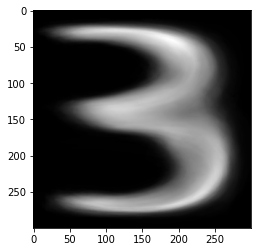

In [ ]:
#Creating and plotting affine rigide image of femoral cartilage 
image_moyenne_affine_femur = np.zeros((300,300))
for i in range(len(names)):
    im = Image.open('Final_Data/Femur/Map/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_femur+=im_arr
image_moyenne_affine_femur//=len(names)
#Plotting rigide average images of femoral cartilage 
plt.imshow(image_moyenne_affine_femur,cmap="gray")
plt.imsave("Final_Data/Femur/Map/Rigid/image_moyenne_femur_patho_Stanford.png",image_moyenne_affine_femur,cmap="gray")
plt.plot

## Max

<function matplotlib.pyplot.plot>

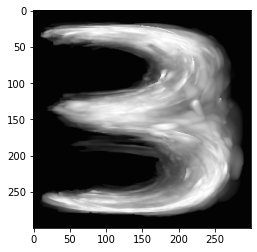

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine = Image.open('Final_Data/Femur/Map/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]>image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave("Final_Data/Femur/Map/Affine/image_max_patho_Stanford.png",image_max_affine_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

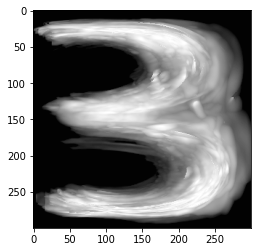

In [ ]:
#Create max images after rigide registration of superior tibial cartilage
image_max_affine = Image.open('Final_Data/Femur/Map/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]>image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave('Final_Data/Femur/Map/Rigid/image_max_patho_Stanford.png',image_max_affine_array,cmap="gray")
plt.plot

## Min

<function matplotlib.pyplot.plot>

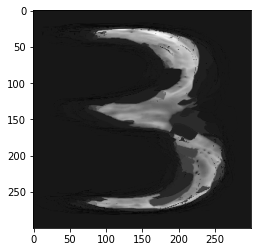

In [ ]:
#Create max images after affine registration of femoral cartilage 
image_max_affine = Image.open('Final_Data/Femur/Map/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]<image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave('Final_Data/Femur/Map/Affine/image_min_patho_Stanford.png',image_max_affine_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

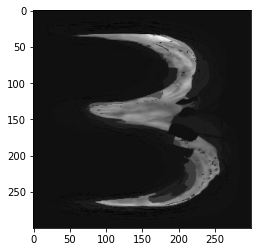

In [ ]:
#Create max images after rigide registration of femoral cartilage 
image_max_affine = Image.open('Final_Data/Femur/Map/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_arr = np.asarray(image_max_affine)
image_max_affine_array = np.copy(image_max_affine_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Femur/Map/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(300):
        for k in range(300):
            if im_arr[j][k]<image_max_affine_array[j][k]:
                image_max_affine_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_array,cmap="gray")
plt.imsave('Final_Data/Femur/Map/Rigid/image_min_patho_Stanford.png',image_max_affine_array,cmap="gray")
plt.plot

# Tibias pathos

In [ ]:
#import the metadata file
source_folder = os.path.join('Final_Data','Tibia')
metadata = os.path.join(source_folder,'Metadata.xlsx')
df = pd.read_excel(metadata)
print(df.head())

       Name  Orientation_pca Orientation_manual  Label  From_Stanford
0  Tibia_01                0                  D      1              0
1  Tibia_02                0                  D      1              0
2  Tibia_03                0                  G      1              0
3  Tibia_04                0                  G      1              0
4  Tibia_06                0                  D      1              0


In [ ]:
# select the data from Stanford and those which are healthy
df_mask=df['From_Stanford']==1
filtered_df = df[df_mask]
df_mask2=df['Label']==1
filtered_df2 = filtered_df[df_mask2]
print(filtered_df2)

              Name  Orientation_pca Orientation_manual  Label  From_Stanford
40   Tibia_PHC_006                1                  G      1              1
52   Tibia_PHC_030                0                  G      1              1
60   Tibia_PHC_045                1                  G      1              1
67   Tibia_PHC_053                0                  D      1              1
73   Tibia_PHC_066                0                  D      1              1
75   Tibia_PHC_071                1                  G      1              1
80   Tibia_PHC_083                0                  D      1              1
81   Tibia_PHC_084                1                  D      1              1
82   Tibia_PHC_087                1                  G      1              1
84   Tibia_PHC_094                0                  G      1              1
94   Tibia_PHC_105                1                  D      1              1
106  Tibia_PHC_126                0                  D      1              1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
# extract the names of the files and their orientation
names = filtered_df2['Name'].to_list()
print(names)

['Tibia_PHC_006', 'Tibia_PHC_030', 'Tibia_PHC_045', 'Tibia_PHC_053', 'Tibia_PHC_066', 'Tibia_PHC_071', 'Tibia_PHC_083', 'Tibia_PHC_084', 'Tibia_PHC_087', 'Tibia_PHC_094', 'Tibia_PHC_105', 'Tibia_PHC_126', 'Tibia_PHC_139', 'Tibia_PHC_140', 'Tibia_PHC_150', 'Tibia_PHC_152', 'Tibia_PHC_154', 'Tibia_PHC_156', 'Tibia_PHC_158', 'Tibia_PHC_167', 'Tibia_PHC_172', 'Tibia_PHC_183', 'Tibia_PHC_184', 'Tibia_PHC_186', 'Tibia_PHC_189', 'Tibia_PHC_194', 'Tibia_PHC_200', 'Tibia_PHC_201', 'Tibia_PHC_207', 'Tibia_PHC_218', 'TIbia_PHC_224', 'Tibia_PHC_227', 'Tibia_PHC_229', 'Tibia_PHC_230', 'Tibia_PHC_237', 'Tibia_PHC_241', 'Tibia_PHC_245']


## Mean


<function matplotlib.pyplot.plot>

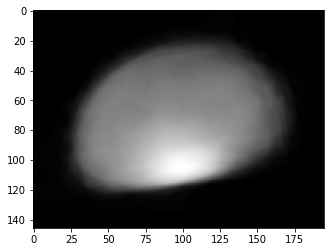

In [ ]:
#Create average images after affine registration of superior tibial cartilage
image_moyenne_affine_haut = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_haut+=im_arr
image_moyenne_affine_haut//=len(names)
#Plotting average images 
plt.imshow(image_moyenne_affine_haut,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Affine/image_moyenne_haut_patho_Stanford.png',image_moyenne_affine_haut,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

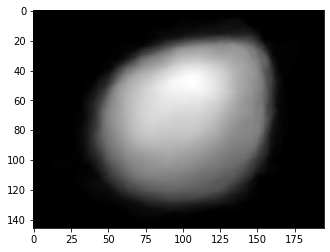

In [ ]:
#Creating average image of lower tibial cartilage after affine registration 
image_moyenne_affine_bas = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_affine_bas+=im_arr
image_moyenne_affine_bas//=len(names)
#Plotting the average image
plt.imshow(image_moyenne_affine_bas,cmap="gray")
plt.imsave("Final_Data/Tibia/Map/Genoux_bas/Affine/image_moyenne_bas_patho_Stanford.png",image_moyenne_affine_bas,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

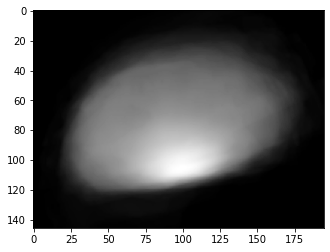

In [ ]:
#Create average image of tibial Cartilage after rigid registration 
image_moyenne_rigide_haut = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_rigide_haut+=im_arr
image_moyenne_rigide_haut//=len(names)
plt.imshow(image_moyenne_rigide_haut,cmap="gray")
#plotting the average images 
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Rigid/image_moyenne_haut_patho_Stanford.png',image_moyenne_rigide_haut,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

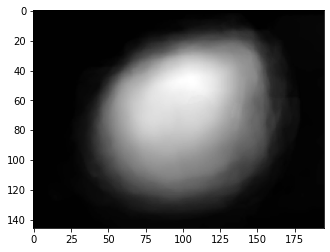

In [ ]:
#Creating average image of lower tibial cartilage after rigid registration 
image_moyenne_rigide_bas = np.zeros((146,195))
for i in range(len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    image_moyenne_rigide_bas+=im_arr
image_moyenne_rigide_bas//=len(names)
plt.imshow(image_moyenne_rigide_bas,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Rigid/image_moyenne_bas_patho_Stanford.png',image_moyenne_rigide_bas,cmap="gray")
plt.plot

## Max

<function matplotlib.pyplot.plot>

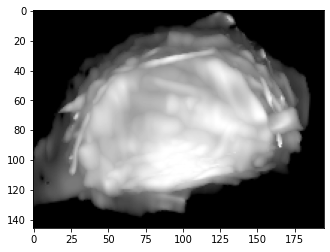

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Affine/image_max_haut_patho_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

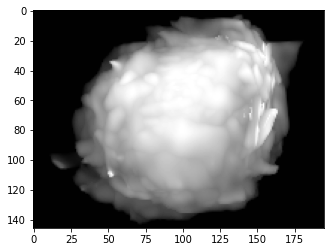

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Affine/image_max_haut_patho_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

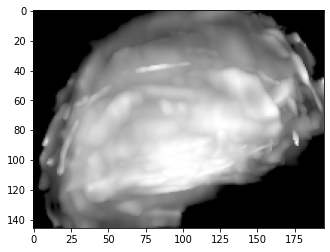

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Rigid/image_max_haut_patho_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

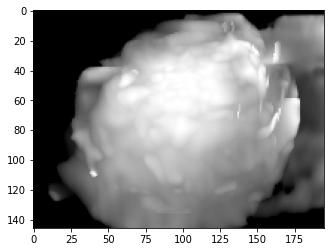

In [ ]:
#Create max images after affine registration of superior tibial cartilage
image_max_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[0]+'.png') .convert("L")
image_max_affine_haut_arr = np.asarray(image_max_affine_haut)
image_max_affine_haut_array = np.copy(image_max_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]>image_max_affine_haut_array[j][k]:
                image_max_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_max_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Rigid/image_max_bas_patho_Stanford.png',image_max_affine_haut_array,cmap="gray")
plt.plot

## Min

<function matplotlib.pyplot.plot>

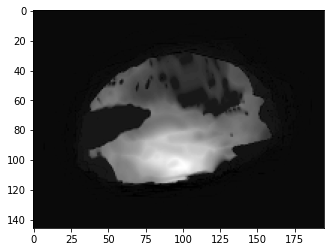

In [ ]:
#Create min images after affine registration of superior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Affine/image_min_haut_patho_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

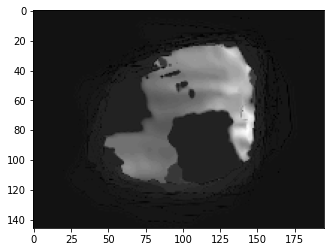

In [ ]:
#Create min images after affine registration of superior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Affine/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Affine/image_min_bas_patho_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

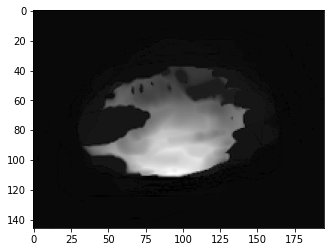

In [ ]:
#Create min images after affine registration of superior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_haut/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_haut/Rigid/rigide_min_haut_patho_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot

<function matplotlib.pyplot.plot>

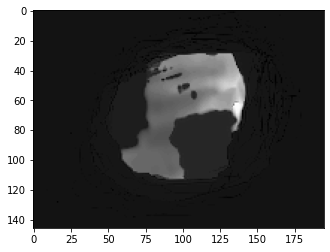

In [ ]:
#Create min images after affine registration of superior tibial cartilage
image_min_affine_haut = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[0]+'.png') .convert("L")
image_min_affine_haut_arr = np.asarray(image_min_affine_haut)
image_min_affine_haut_array = np.copy(image_min_affine_haut_arr)
for i in range(1,len(names)):
    im = Image.open('Final_Data/Tibia/Map/Genoux_bas/Rigid/'+names[i]+'.png').convert("L")
    im_arr = np.asarray(im)
    for j in range(146):
        for k in range(195):
            if im_arr[j][k]<image_min_affine_haut_array[j][k]:
                image_min_affine_haut_array[j][k] = im_arr[j][k]
#Plotting average images 
plt.imshow(image_min_affine_haut_array,cmap="gray")
plt.imsave('Final_Data/Tibia/Map/Genoux_bas/Rigid/image_min_bas_patho_Stanford.png',image_min_affine_haut_array,cmap="gray")
plt.plot